In [18]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt   # main plotting library
import re
import preprocessor as p 
import os

import nltk 
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize 
import json
import urllib
from bs4 import BeautifulSoup
from wordcloud import WordCloud   



nltk.download('punkt')
nltk.download('stopwords')
sw = set(stopwords.words('english'))
sid = SentimentIntensityAnalyzer() 

def sentiment_analyzer(token_list):
    s=" ".join(token_list)
    return sid.polarity_scores(s)


    # Make a wordcloud in a shape of the Tesla Cybertruck!
    # Open up the Console wide to allow full image to display
#     wave_mask = np.array(Image.open("cybertruck.jpg"))
#     wordcloud = WordCloud(width = 1000, height = 700, max_font_size = 50, min_font_size = 5, mask = wave_mask).generate(allTweets)
#     plt.figure(figsize=(14, 12))
#     plt.imshow(wordcloud, interpolation="bilinear")
#     plt.axis("off")
#     plt.margins(x=0, y=0)
#     plt.show()


directory = "./data/nytimes/"

articles = []

outfile = open("scores11.csv", "a+")
f = open(directory+"11.json", "r")
articles =json.load(f)['response']['docs']
f.close()
myCloud = []
for article in articles:
    abstract = article['abstract'].lower()
    if "outbreak" in abstract or "virus" in abstract or "covid" in abstract:
        url = article['web_url']
        if "video" in url or "interactive" in url:
            print(url)
        else:
            c = urllib.request.urlopen(url)
            parsed = BeautifulSoup(c, 'html.parser')
            articleBody = parsed.find(attrs={"name": "articleBody"})
            if articleBody is not None:
                textbody = articleBody.text
                cleaned = word_tokenize(re.sub("[^a-zA-Z]", " ", p.clean(textbody)).strip().lower())
                token_list = [w for w in cleaned if not w in sw]  
                #### Sentiment analyzer
                #scores = sentiment_analyzer(token_list)
                #toWrite = str(scores['neg'])+","+ str(scores['neu'])+","+str(scores['pos'])+","+str(scores['compound'])+","+article['pub_date']
                #outfile.write(toWrite+"\n")
                
                ## WordCloud
                myCloud = myCloud + token_list
            else:
                print(url)

                                  

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Yan\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Yan\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


https://www.nytimes.com/video/world/europe/100000007429934/merkel-germany-coronavirus-lockdown-light.html
https://www.nytimes.com/interactive/2020/11/06/world/europe/europe-covid-hospitals.html
https://www.nytimes.com/video/us/politics/100000007444602/biden-coronavirus-briefing.html
https://www.nytimes.com/video/us/politics/100000007445000/biden-coronavirus-briefing.html
https://www.nytimes.com/video/us/politics/100000007444937/de-blasio-new-york-virus-spike-restrictions.html
https://www.nytimes.com/video/world/europe/100000007449644/spain-unveils-new-covid-strategy.html
https://www.nytimes.com/interactive/2020/11/11/science/wear-mask-covid-particles-ul-fr.html
https://www.nytimes.com/interactive/2020/11/11/us/politics/white-house-covid-outbreak.html
https://www.nytimes.com/video/world/africa/100000007449921/south-africa-lift-coronavirus-restrictions.html
https://www.nytimes.com/video/us/politics/100000007451170/wisconsin-ohio-coronavirus-restrictions.html
https://www.nytimes.com/video

In [13]:
outfile.close()

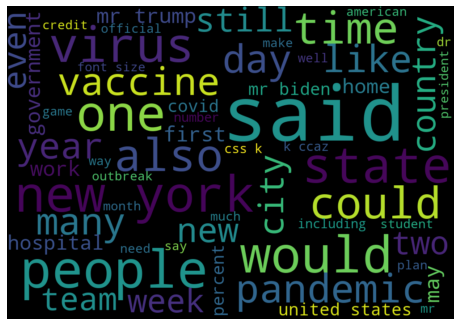

In [22]:
def word_cloud(words):
    # Make standard Wordcloud
    worC = WordCloud(width = 1000, 
                     height = 700, 
                     margin = 0, 
                     max_font_size = 170, 
                     min_font_size = 25, 
                     stopwords = sw).generate(" ".join(list(words)))
    plt.figure(figsize=(8, 6))
    plt.imshow(worC, interpolation='bilinear')
    plt.axis("off")
    plt.margins(x=0, y=0)
    plt.show()

word_cloud(myCloud)  

In [20]:
textbody

'Listen and subscribe to The DailyApple Podcasts | Spotify | StitcherFor Americans, months of collective isolation and fear could soon be winding down. A viable coronavirus vaccine may be just weeks away.According to a timeline described by Dr. Moncef Slaoui, head of Operation Warp Speed, the federal effort to accelerate vaccine development, the first Americans could receive a shot as early as mid-December, with herd immunity potentially reached by May 2021.That timeline, while feasible on paper, requires a lot of things to go right.With vaccines within reach, we turn to more logistical questions: Who will receive the shots first, and in what order will others follow? Who will distribute it? And what could go wrong?We want to hear from you. Fill out our survey about The Daily and other shows at: nytimes.com/thedailysurveyOn today’s episodeKatie Thomas, who covers the drug industry for The New York Times.ImageTwo companies, Pfizer and Moderna, have estimated they will have 45 million do